In [ ]:
!pip install yfinance python-binance
import numpy as np
import pandas as pd
import yfinance

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from datetime import datetime
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[*********************100%***********************]  1 of 1 completed


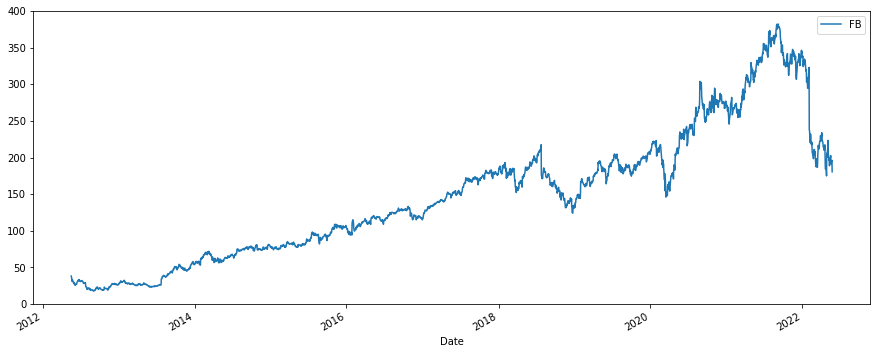

In [ ]:
ticker = 'FB'
data = pd.DataFrame()
data[ticker] = yfinance.download(ticker,period="30y")['Adj Close']
#Plot
data.plot(figsize=(15,6))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


FB    0.000321
dtype: float64

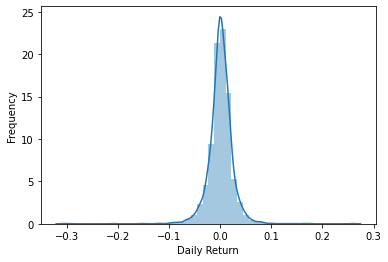

In [ ]:
log_returns = np.log(1 + data.pct_change())
#Plot
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)
drift

In [ ]:
stdev = log_returns.std()
days = 365*3
trials = 10000
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift.values + stdev.values * Z)

In [ ]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = data.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]
pd.DataFrame(price_paths)

In [ ]:
pd.DataFrame(price_paths)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,180.550003,180.550003,180.550003,180.550003,180.550003,180.550003,180.550003,180.550003,180.550003,180.550003,...,180.550003,180.550003,180.550003,180.550003,180.550003,180.550003,180.550003,180.550003,180.550003,180.550003
1,182.507282,171.383729,173.920685,178.073443,172.603753,182.923399,180.335283,175.644667,181.599073,181.393189,...,178.275444,180.158773,183.258579,183.505707,179.447753,170.624667,173.774865,188.178776,183.420205,177.513227
2,171.967357,172.954210,182.544646,176.220138,170.833292,179.716164,181.870538,172.978892,184.765499,181.516640,...,183.602726,177.256271,178.265039,176.413535,178.310387,167.349355,170.095591,185.695298,187.242466,181.785440
3,174.743271,180.061750,172.942425,167.785143,167.153019,177.282970,193.040245,167.590714,185.964830,183.953651,...,191.228615,173.768040,179.726133,179.107271,185.399332,170.991421,169.318460,192.710999,177.735389,186.301049
4,171.642536,175.483238,174.588214,167.229780,164.282165,181.165088,197.108386,168.978996,187.603948,183.767728,...,188.183493,173.557048,185.983711,182.192942,178.537600,165.349116,166.492562,198.099754,178.759219,192.008191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,232.123233,747.358589,178.201150,96.842866,480.291113,189.433970,341.761737,818.439991,484.835995,161.997298,...,327.456572,530.491043,663.573857,219.381749,184.503981,781.958075,244.866735,156.083063,148.895302,209.296658
1091,237.008005,752.541501,178.367568,95.199824,493.212313,194.453948,327.855976,844.254950,474.931336,162.102068,...,330.164659,545.107780,681.390310,213.750115,181.151250,782.517682,237.879213,153.774428,143.807170,204.921358
1092,240.816944,755.332818,182.420739,95.014043,492.641865,191.224983,333.563578,793.038960,463.010181,159.067604,...,321.485275,572.903847,685.814556,220.546067,182.311488,800.913592,258.087858,149.389424,143.235302,210.968228
1093,252.093300,718.827271,187.167821,91.800608,501.360852,192.082692,339.579908,830.140476,450.956145,163.113868,...,324.375772,578.624604,679.926762,216.955860,187.672094,833.280828,251.795997,149.575564,142.840638,211.104635


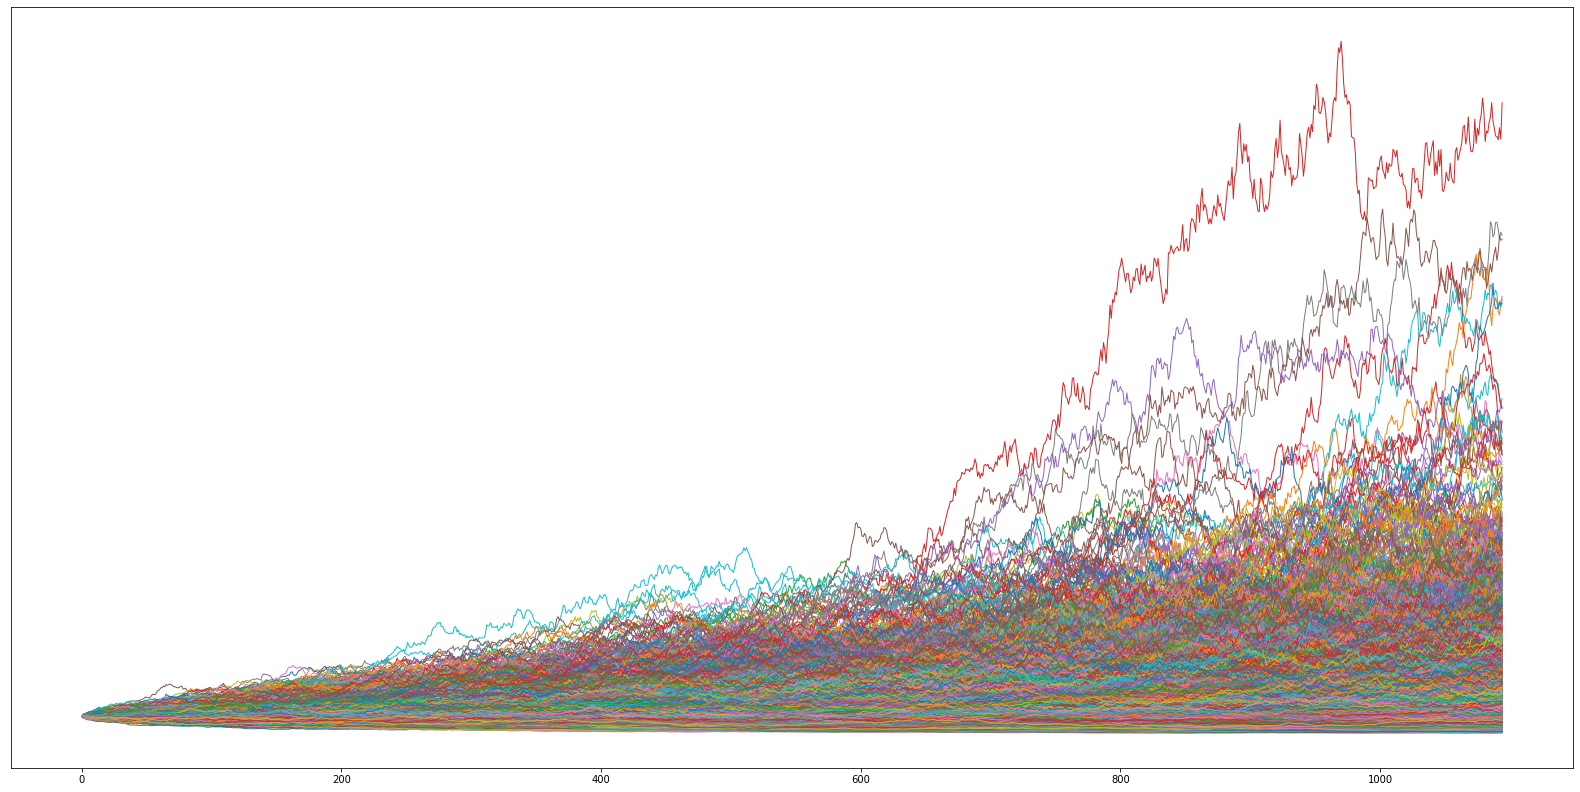

In [ ]:
def graph_stocks(stock):
  #graph all stocks
  plt.figure(figsize=(28, 14))
  for c in stock.columns.values:
    #print(c)
    fig = plt.plot(stock.index, stock[c], lw=1, alpha=1)
  #plt.legend(loc='upper left', fontsize=12)
  #plt.ylabel('price in $')
#remove axis labels
  plt.gca().axes.get_yaxis().set_visible(False)
graph_stocks(pd.DataFrame(price_paths))

In [ ]:
def getBinancePrices(tickers, monthsAgo):
  api_key = ""
  api_secret = ""
  client = Client(api_key, api_secret)

  tickers = tickers

  dfPrices = pd.DataFrame()
  for tick in tickers:
    klines = client.get_historical_klines(f"{tick}USDT", Client.KLINE_INTERVAL_1DAY, f"{monthsAgo} months ago UTC")
    # klines = client.get_historical_klines(f"{tick}USDT", Client.KLINE_INTERVAL_1HOUR, "1 May, 2022", "now")
    df = pd.DataFrame(klines)
    lst = []
    for i in klines:
      datee = datetime.fromtimestamp(i[0] / 1000)
      lst.append(str(datee))

    df['Date1'] = lst
    df['Date'] = pd.to_datetime(df['Date1'], format='%Y-%m-%d %H')

    df = df.drop(columns=[0, 5, 6, 7, 8, 9, 10, 11, 2, 3, 4, 'Date1'])
    df[f'Close_{tick}'] = df[1]
    dfPrices = pd.concat([dfPrices, df[f'Close_{tick}']], axis=1)
  dfPrices['Date'] = df.Date

  dfPrices = dfPrices.set_index("Date")
  dfPrices = dfPrices.astype(float)

  return dfPrices

,Close_LINK,Close_SUSHI
Date,,
2021-05-25,26.400,11.989
2021-05-26,27.505,12.232
2021-05-27,34.030,13.426
2021-05-28,31.723,12.119
2021-05-29,27.872,10.596
...,...,...
2022-05-20,7.230,1.355
2022-05-21,6.860,1.295
2022-05-22,7.050,1.449


In [ ]:
def calculations(tickers, monthTocloeectData, trials, yearsTosimulate):
  dfPrices = getBinancePrices(tickers, monthTocloeectData)
  dictOfmoniCarlo = {}
  for column in dfPrices.columns:
    data = dfPrices[column]
    log_returns = np.log(1 + data.pct_change())
    u = log_returns.mean()
    var = log_returns.var()
    drift = u - (0.5*var)
    stdev = log_returns.std()
    days = 365*yearsTosimulate
    Z = norm.ppf(np.random.rand(days, trials)) #days, trials
    daily_returns = np.exp(drift + stdev * Z)
    price_paths = np.zeros_like(daily_returns)
    price_paths[0] = data.iloc[-1]
    for t in range(1, days):
        price_paths[t] = price_paths[t-1]*daily_returns[t]
    dictOfmoniCarlo[column] = price_paths
  return dictOfmoniCarlo
tickers = ['LINK', 'ADA', 'BTC']
dfPrices = getBinancePrices(tickers, 12)
results = calculations(tickers, 30, 10000, 10)
pd.DataFrame(results['Close_LINK'])

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,7.030000,7.030000,7.030000,7.030000,7.030000,7.030000,7.030000,7.030000,7.030000,7.030000,...,7.030000,7.030000,7.030000,7.030000,7.030000,7.030000,7.030000,7.030000,7.030000,7.030000
1,6.805318,6.667992,6.674262,6.738139,7.377600,7.432653,7.306197,6.195135,7.346886,6.715254,...,6.901245,6.917952,8.130151,7.459568,7.188087,7.149288,6.983291,7.172954,6.906231,7.317981
2,6.904820,6.615981,6.600241,6.676045,8.256327,7.448724,7.226881,6.425701,7.620424,7.060831,...,6.949455,6.558794,8.287534,6.901736,6.909310,7.780303,7.236856,6.479029,7.393398,6.539490
3,6.117419,6.074594,7.948960,6.207668,8.691527,7.310213,8.178947,5.825614,7.704204,8.183055,...,6.879676,6.962659,8.309366,7.288770,6.989305,7.618753,8.322072,6.094888,6.588250,6.272235
4,6.408125,5.851516,8.105322,6.175608,8.690006,8.391869,7.939948,5.294718,7.043791,7.952931,...,8.678323,7.523045,9.193633,7.044307,6.637724,7.806662,8.349080,5.998787,6.855174,6.361706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.842280,0.430889,1.013945,2.433404,5.859366,0.026079,0.113014,0.060964,0.333845,0.199372,...,0.098950,2.564455,89.816067,1.843504,1.040856,0.181385,0.254081,12.454587,1.610241,0.141567
1091,0.920819,0.391309,0.988324,2.317817,6.107175,0.024924,0.108151,0.064064,0.318599,0.197958,...,0.103444,2.347290,90.951683,1.589501,1.047639,0.173526,0.248600,10.202780,1.674121,0.146282
1092,0.901210,0.419242,0.952274,2.267212,6.051992,0.023253,0.112977,0.062015,0.308190,0.196548,...,0.095277,2.512403,85.304056,1.660056,1.009982,0.177723,0.254552,10.716230,1.933468,0.134737
1093,0.861677,0.458246,1.098564,2.367064,6.190073,0.022673,0.102953,0.065056,0.332652,0.186911,...,0.089453,2.284023,87.853485,1.542007,1.062212,0.151497,0.253944,10.564150,1.669438,0.144791


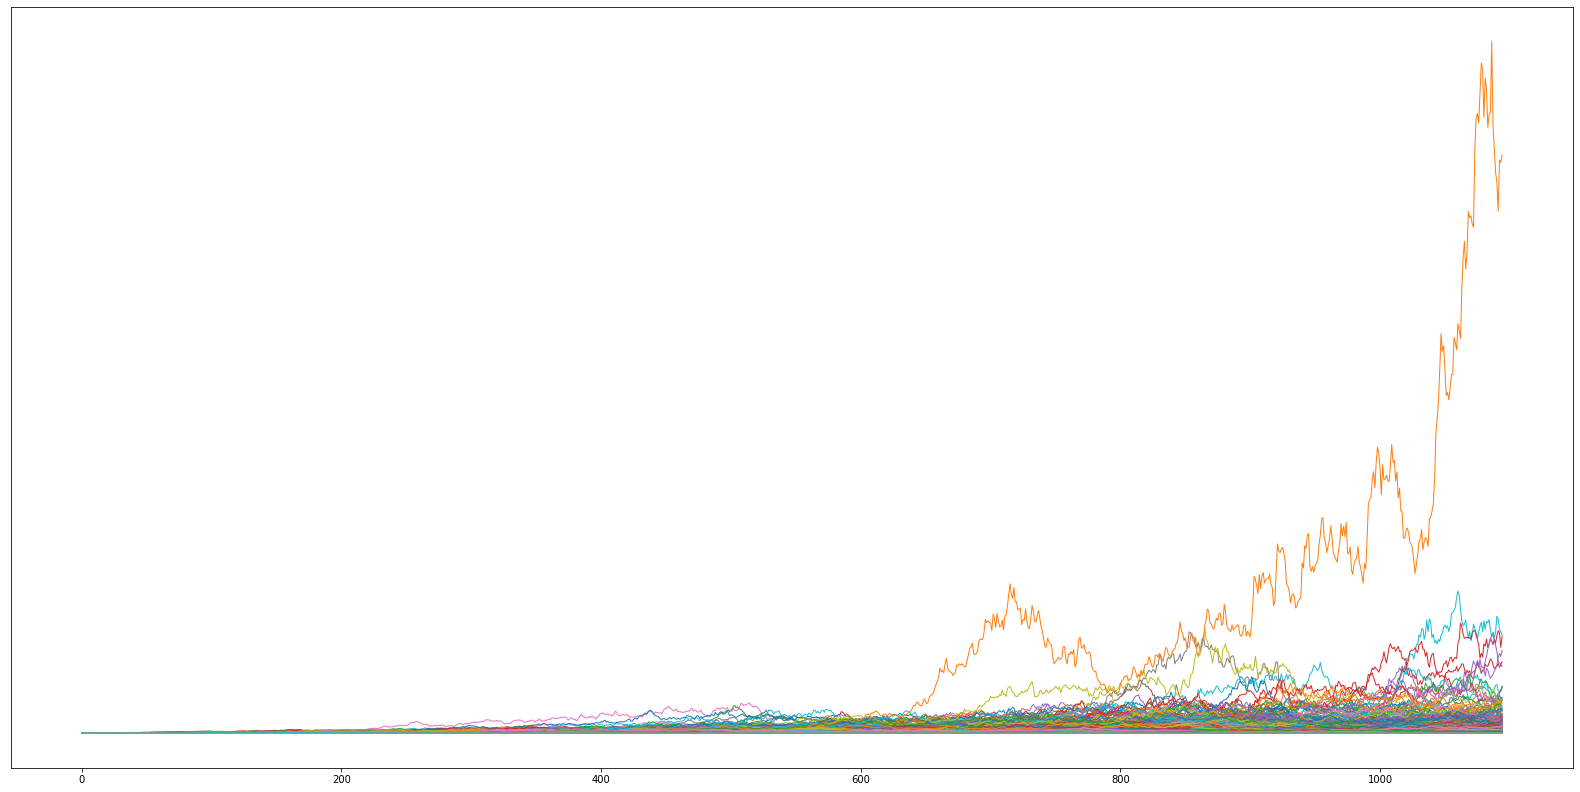

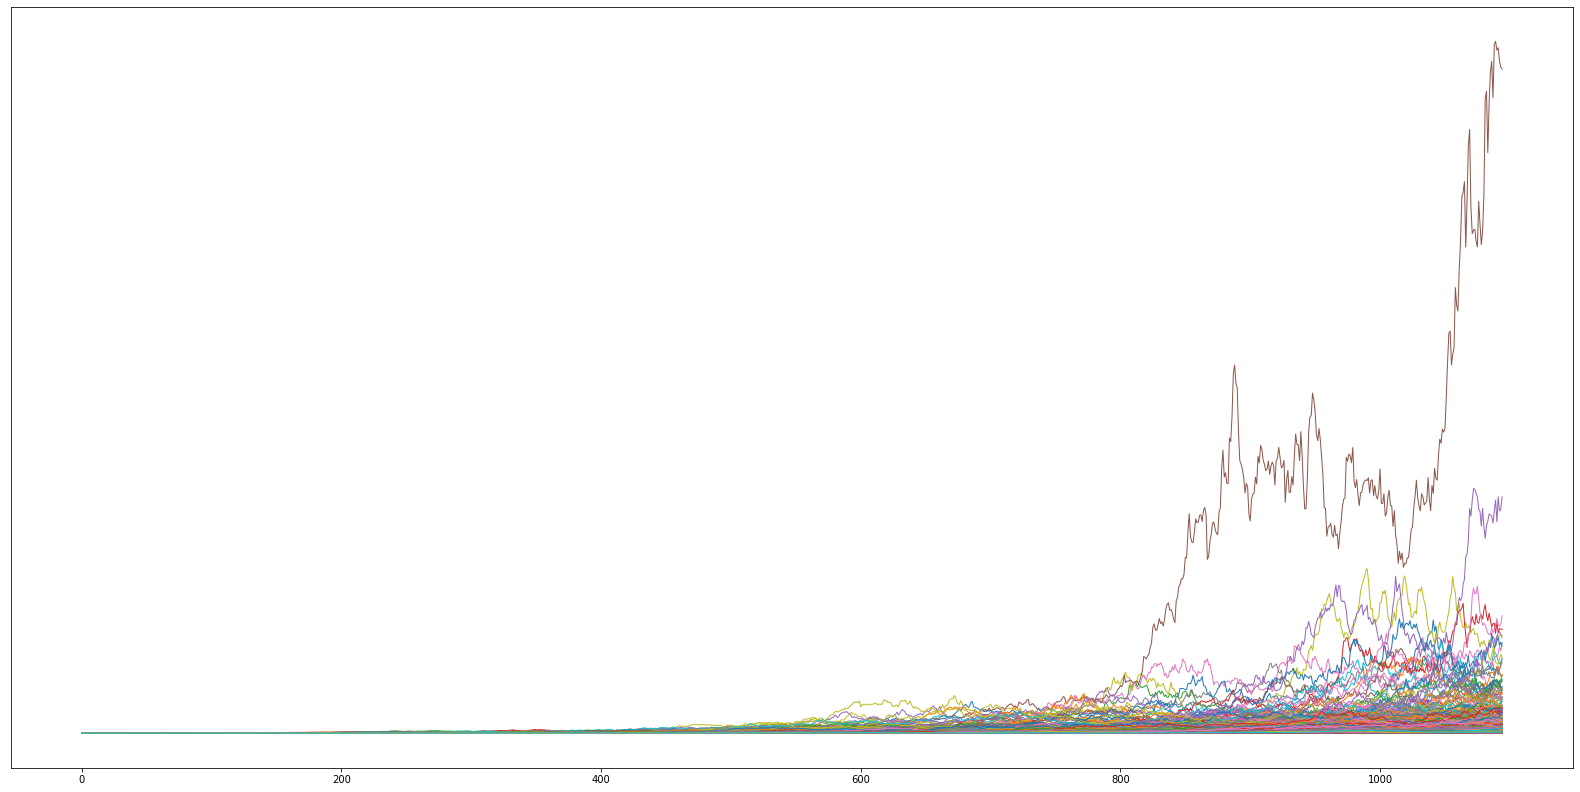

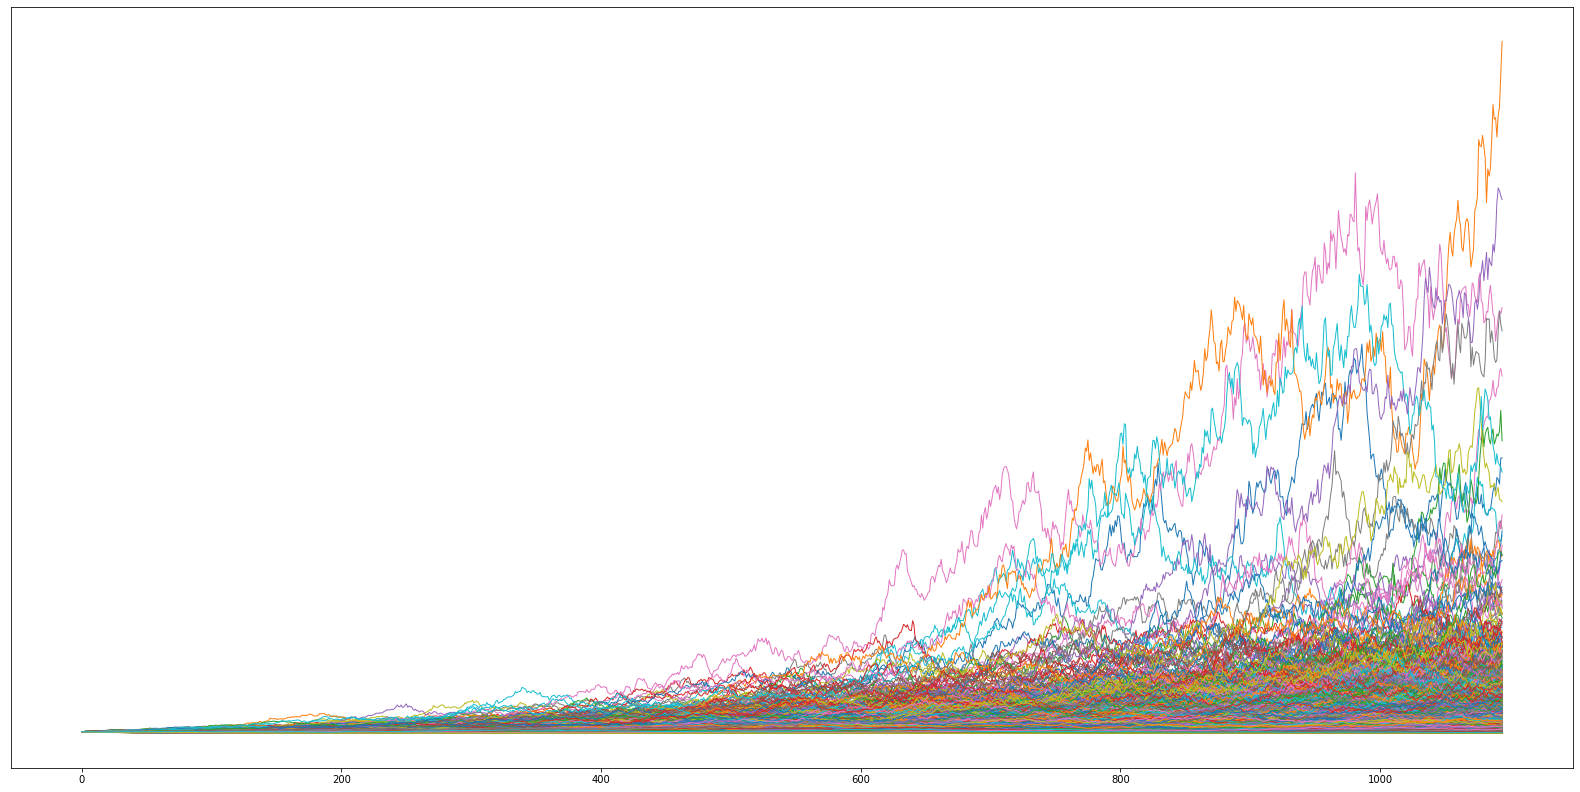

In [ ]:
def forPlot(results):
  for i in results:
    graph_stocks(pd.DataFrame(results[i]))
forPlot(results)

In [ ]:
def graph_stocks(stock):
  #graph all stocks
  plt.figure(figsize=(28, 14))
  for c in stock.columns.values:
    #print(c)
    fig = plt.plot(stock.index, stock[c], lw=1, alpha=1)
  #plt.legend(loc='upper left', fontsize=12)
  #plt.ylabel('price in $')
#remove axis labels
  plt.gca().axes.get_yaxis().set_visible(False)
# graph_stocks(pd.DataFrame(price_paths))

In [ ]:
dfPrices

,Close_LINK,Close_SUSHI
Date,,
2021-05-25,26.400,11.989
2021-05-26,27.505,12.232
2021-05-27,34.030,13.426
2021-05-28,31.723,12.119
2021-05-29,27.872,10.596
...,...,...
2022-05-20,7.230,1.355
2022-05-21,6.860,1.295
2022-05-22,7.050,1.449


In [23]:
import nest_asyncio
nest_asyncio.apply()
__import__('IPython').embed()

/usr/local/lib/python3.7/dist-packages/IPython/core/magic_arguments.py:146: RuntimeWarning: coroutine 'say_hello' was never awaited
  parser = MagicArgumentParser(arg_name, **kwds)
/usr/local/lib/python3.7/dist-packages/IPython/core/magic_arguments.py:146: RuntimeWarning: coroutine 'get_items' was never awaited
  parser = MagicArgumentParser(arg_name, **kwds)


Python 3.7.13 (default, Apr 24 2022, 01:04:09) 
Type "copyright", "credits" or "license" for more information.

IPython 5.5.0 -- An enhanced Interactive Python.
?         -> Introduction and overview of IPython's features.
%quickref -> Quick reference.
help      -> Python's own help system.
object?   -> Details about 'object', use 'object??' for extra details.

In [1]: 



KeyboardInterrupt: ignored

In [27]:
import asyncio
from ipykernel.eventloops import register_integration

@register_integration('asyncio')
# define a coroutine to simulate retrieval of an item
async def get_item(i):
	await asyncio.sleep(i)
	return f'item {i}'


# define a coroutine which executes several coroutines
async def get_items(num_items):
	print('getting items')
  
  # create a list of Tasks
	item_coros = [asyncio.create_task(get_item(i)) for i in range(num_items)]
	print('waiting for tasks to complete')
  
  # wait for all Tasks to complete
	completed, pending = await asyncio.wait(item_coros)
  
  # access the Task results
	results = [task.result() for task in completed]
	print(f'results: {results}')
	print(pending)

# create an event loop
loop = asyncio.get_event_loop()
try:
  # execute the coroutine in the event loop
	loop.run_until_complete(get_items(4))
finally:
	loop.close()

getting items
waiting for tasks to complete
results: ['item 0', 'item 2', 'item 3', 'item 1']
set()


RuntimeError: ignored

In [39]:
import concurrent.futures
import asyncio
import time

# we create our blocking target function for multi-threading
def blocking_func(n):
	time.sleep(0.5)
	return n ** 2


# we define our main coroutine
@register_integration('asyncio')
async def main(loop, executor):
	print('creating executor tasks')
  
  # create a list of coroutines and execute in the event loop
	blocking_tasks = [loop.run_in_executor(executor, blocking_func, i) for i in range(5)]
	print('waiting for tasks to complete')
  
  # group the results of all completed coroutines
	results = await asyncio.gather(*blocking_tasks)
	print(f'results: {results}')


if __name__ == '__main__':
  start_time = time.time()
  executor = concurrent.futures.ThreadPoolExecutor(max_workers=3)
  loop = asyncio.get_event_loop()
  
  try:
    loop.run_until_complete(main(loop, executor))
  finally:
    print("--- %s seconds ---" % (time.time() - start_time))
    loop.close()

creating executor tasks
waiting for tasks to complete
results: [0, 1, 4, 9, 16]
--- 1.0038375854492188 seconds ---


RuntimeError: ignored

In [40]:
start_time = time.time()
blocking_tasks = [(blocking_func(i)) for i in range(5)]

print(blocking_tasks)
print("--- %s seconds ---" % (time.time() - start_time))

[0, 1, 4, 9, 16]
--- 2.5100502967834473 seconds ---
